# Chapter 5 - Differential Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
%matplotlib notebook

In [2]:
def deriv(func,x0,h):
    '''
    Centred-finite difference
    '''
    xL = x0-h
    xR = x0+h    
    dfunc = (func(xR) - func(xL))/2./h
    
    return dfunc

In [8]:
def solver_euler(f,x_init,x_fin,y0,stepsize, quiet=False):
    x_array = np.arange(x_init,x_fin+stepsize,stepsize)
    steps=len(x_array)-1
    y_sol=[y0]
    for x in range(steps):
        x1=x_array[x]
        x2=x_array[x+1]

        y_step = y_sol[x] + stepsize * f(x1,y_sol[x])
        y_sol.append(y_step)
    return x_array, y_sol

In [9]:
def solver_implicit(f,x_init,x_fin,y0,stepsize,tol=1e-8, quiet=False):
    x_array = np.arange(x_init,x_fin,stepsize)
    steps=len(x_array)-1
    y_sol=[y0]
    for x in range(steps):
        x1=x_array[x]
        x2=x_array[x+1]

        f_imp = lambda z: z - y_sol[x] - stepsize/2.*(f(x1,y_sol[x]) + f(x2,z))
        y_init = y_sol[x] + stepsize * f(x1,y_sol[x])

        #print(y_init)
        y_step = newton(f_imp, y_init, tol, stepsize/2.,quiet=quiet)
        if y_step == 'error':
            print('Error!')
            return
        y_sol.append(y_step)
    return x_array, y_sol

In [10]:
def solver_rk2(f,x_init,x_fin,y0,stepsize, quiet=False):
    x_array = np.arange(x_init,x_fin+stepsize,stepsize)
    steps=len(x_array)-1
    y_sol=[y0]
    for x in range(steps):
        x1=x_array[x]
        x2=x_array[x+1]

        dy1 = stepsize * f(x1,y_sol[x])
        dy2 = stepsize * f(x1+stepsize/2.0,y_sol[x] + dy1/2.0)
        
        y_step = y_sol[x] + dy2
        y_sol.append(y_step)
    return x_array, y_sol

In [11]:
def solver_rk4(f,x_init,x_fin,y0,stepsize, quiet=False):
    x_array = np.arange(x_init,x_fin+stepsize,stepsize)
    steps=len(x_array)-1
    y_sol=[y0]
    for x in range(steps):
        x1=x_array[x]
        x2=x_array[x+1]

        dy1 = stepsize * f(x1,y_sol[x])
        dy2 = stepsize * f(x1+stepsize/2.0,y_sol[x] + dy1/2.0)
        dy3 = stepsize * f(x1+stepsize/2.0,y_sol[x] + dy2/2.0)
        dy4 = stepsize * f(x2,y_sol[x] + dy3)
        
        dy = (dy1 + 2*dy2 + 2*dy3 + dy4)/6.0
        
        y_step = y_sol[x] + dy
        y_sol.append(y_step)
    return x_array, y_sol

### basic idea

In [41]:
#diff_y = lambda x,y: np.cos(y)
#diff_y = lambda x,y: 1.0/y
diff_y = lambda x,y: 0.3*y
#diff_y = lambda x,y: y**2 + (x**4 - 6*x**3 + 12*x**2 -14*x + 9)/(1.0 + x)**2

#x_array, y_sol = solver(diff_y,x_init=0,x_fin=10,y0=1.0,stepsize=0.05, quiet=False)
x_array, y_sol = solver_euler(diff_y,x_init=0.1,x_fin=3.8,y0=1.0,stepsize=0.05, quiet=False)
#x_array, y_sol = solver(diff_y,x_init=0,x_fin=1.6,y0=2.0,stepsize=0.05, quiet=False)

In [42]:
Xs = np.arange(0.5,3.5,0.5)
Ys = np.arange(0.5,3.5,0.5)
X,Y= np.meshgrid(Xs,Ys)

Vx = np.zeros_like(X)
Vy = np.zeros_like(X)


for i,xcoord in enumerate(X):
    for j,ycoord in enumerate(xcoord):
        x,y = X[i,j], Y[i,j]

        Vx[i,j] = 1.0
        Vy[i,j] = diff_y(x,y)

<IPython.core.display.Javascript object>


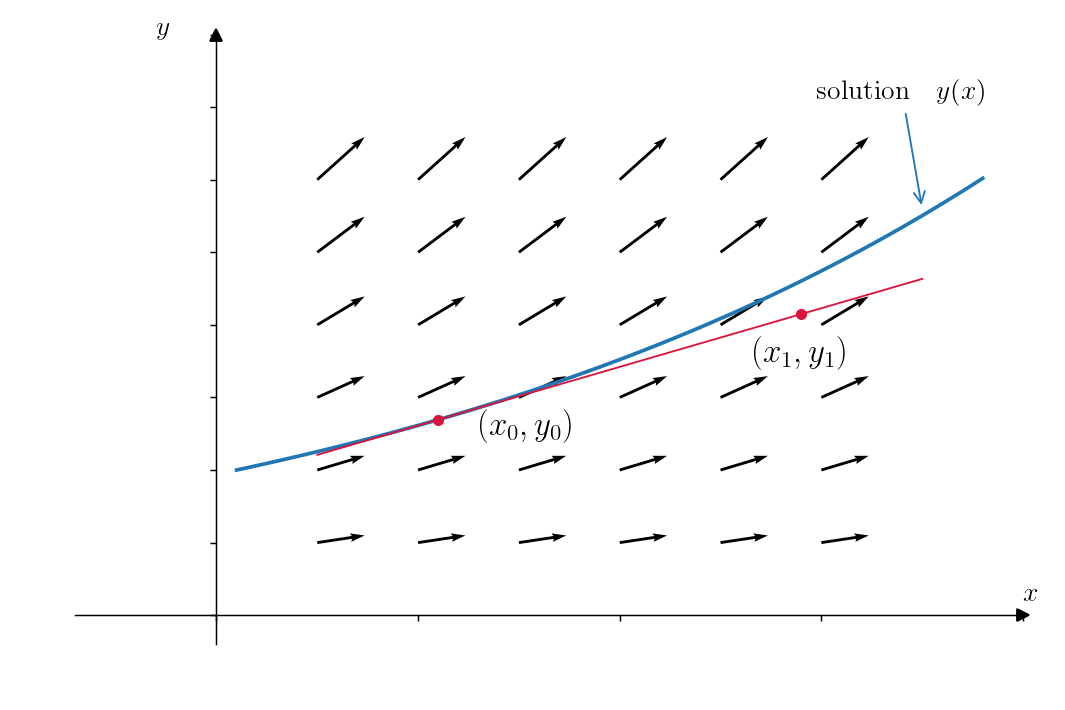

Text(3.4, 3.6, '${\\rm solution \\quad} y(x)$')

In [62]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

#xarray=np.linspace(-1,5,100)
ax.quiver(X,Y,Vx,Vy,scale=20,width=0.003)
ax.plot(x_array,y_sol,color='C0',lw=2)

k=20
x0=x_array[k]
y0=y_sol[k]
m = diff_y(x0,y0)
b = y0 - m*x0 
yline = lambda x: m*x + b

x1=2.9
y1=yline(x1)

xarray=np.linspace(0.5,3.5,50)
ax.plot([x0],[y0],color='crimson',marker='o',markersize=5)
ax.plot([x1],[y1],color='crimson',marker='o',markersize=5)
ax.plot(xarray,yline(xarray),color='crimson',linewidth=1)


squareside=3
centerx=1.5
centery=2
ax.set_xlim([centerx-squareside+0.8,centerx+squareside-0.5])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(1.3,1.3,r'$(x_0,y_0)$', fontsize=18, rotation=0, ha='left', va='center')
ax.text(2.9,1.8,r'$(x_1,y_1)$', fontsize=18, rotation=0, ha='center', va='center')

ax.annotate(r'${\rm solution \quad} y(x)$', xy=(3.5,2.8),xycoords='data',xytext=(3.4, 3.6), fontsize=15,
            textcoords='data',arrowprops=dict(arrowstyle="->",color='C0'),
            horizontalalignment='center',verticalalignment='center')


In [63]:
fig.savefig('../figures/ch6_idea.pdf')